# **Business Objective: Predicting Breast Cancer Survival - Genetic Data**

[Breast cancer](https://www.nationalbreastcancer.org/breast-cancer-facts) is the most common cancer in American women, affecting one in eight, and represents 15% of all new cancer cases in the U.S. An estimated 41,760 women will die from breast cancer in 2020, but there are > 3.5 million survivors in the U.S. What do [genetic data](https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/download) tell us about breast cancer survivors? Here, we predict patients' overall survival using classification models: **Logistic Regression, K-Nearest Neighbor, Support Vector Machine (SVM), Kernel SVM, Decision Tree, Random Forest, and XGBoost Classification**. We then determine which model(s) are the most accurate.

## Import the libraries

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import the gene expression dataset

#### Breast Cancer Gene Expression
* Z-score for mRNA levels
* Number of standard deviations away from the mean of expression in the reference population
* Represents whether a gene is up- or down-regulated relative to normal samples or all other tumor samples

Please go [here](https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric) for the dataset description

In [123]:
brca_expr = pd.read_csv('METABRIC_RNA_Mutation.csv')
X_gene_expr = brca_expr.iloc[:, 31:520].values

y = brca_expr.iloc[:, 24].values

C:\Users\joe_y\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Import the gene mutation dataset

In [124]:
# Set dtype to object since mutations nomenclature are a mix of numbers and letters (i.e. R1200W)
brca_mut = pd.read_csv('METABRIC_RNA_Mutation.csv', dtype=object)
X_gene_mut = brca_mut.iloc[:, 520:].values

In [4]:
brca_gene = brca.iloc[:,31:]

In [125]:
X_gene_mut.shape

(1904, 173)

In [126]:
pd.set_option('display.max_columns', 1000)
brca_mut.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha

Genetics dataset starts from 'brca1'

## Exploratory Data Analysis

Activation of the JAK/STAT pathway plays a critical role in breast cancer tumor progression. Let's take a look at their gene expression levels in Survival vs. No Survival patients. Expression level numbers represent the number of standard deviations away from the mean expression level, which is defined as 0.

### Stat5a expression

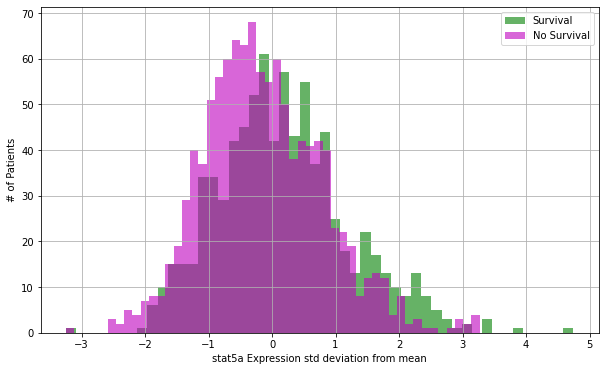

In [127]:
plt.figure(figsize=(10,6))
brca_expr[brca_expr['overall_survival'] == 1]['stat5a'].hist(bins=50, color='green', label='Survival', alpha=0.6)
brca_expr[brca_expr['overall_survival'] == 0]['stat5a'].hist(bins=50, color='m', label='No Survival', alpha=0.6)
plt.xlabel('stat5a Expression std deviation from mean')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

Stat5a expression for survival patients is close to mean expression (0), while stat5a expression for non-survival patients is ~-0.5 standard deviations from mean expression. This result is in line with a 2012 scientific paper detailing that [low levels of Stat5a protein in breast cancer are associated with tumor progression and unfavorable clinical outcomes](https://breast-cancer-research.biomedcentral.com/articles/10.1186/bcr3328).

### Stat5b expression

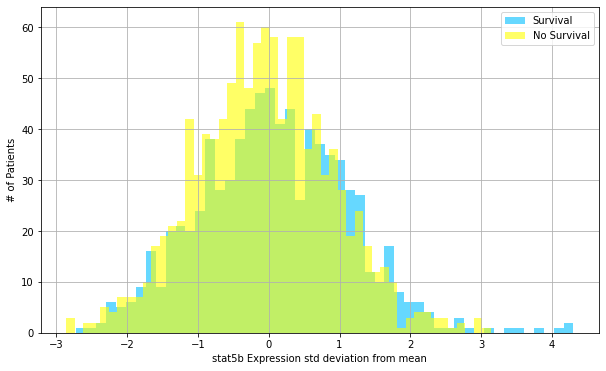

In [128]:
plt.figure(figsize=(10,6))
brca_expr[brca_expr['overall_survival'] == 1]['stat5b'].hist(bins=50, color='deepskyblue', label='Survival', alpha=0.6)
brca_expr[brca_expr['overall_survival'] == 0]['stat5b'].hist(bins=50, color='yellow', label='No Survival', alpha=0.6)
plt.xlabel('stat5b Expression std deviation from mean')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

### Stat1 expression

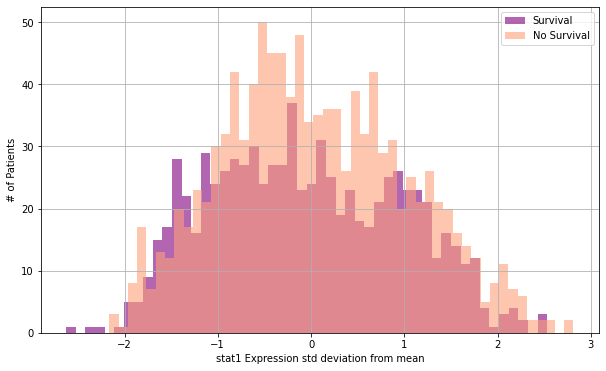

In [129]:
plt.figure(figsize=(10,6))
brca_expr[brca_expr['overall_survival'] == 1]['stat1'].hist(bins=50, color='purple', label='Survival', alpha=0.6)
brca_expr[brca_expr['overall_survival'] == 0]['stat1'].hist(bins=50, color='lightsalmon', label='No Survival', alpha=0.6)
plt.xlabel('stat1 Expression std deviation from mean')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

### Stat2 expression

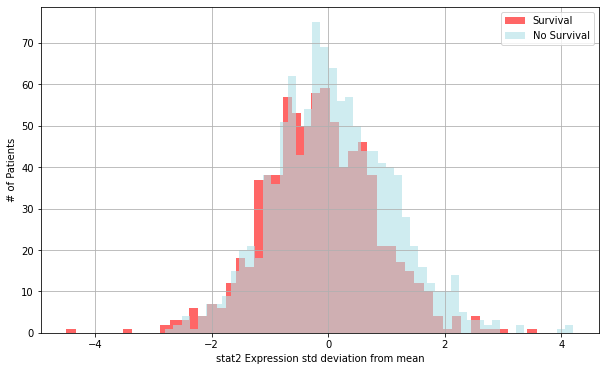

In [130]:
plt.figure(figsize=(10,6))
brca_expr[brca_expr['overall_survival'] == 1]['stat2'].hist(bins=50, color='r', label='Survival', alpha=0.6)
brca_expr[brca_expr['overall_survival'] == 0]['stat2'].hist(bins=50, color='powderblue', label='No Survival', alpha=0.6)
plt.xlabel('stat2 Expression std deviation from mean')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

### Stat3 expression

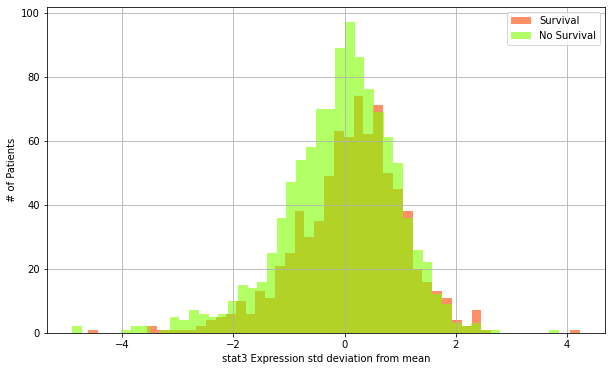

In [131]:
plt.figure(figsize=(10,6))
brca_expr[brca_expr['overall_survival'] == 1]['stat3'].hist(bins=50, color='orangered', label='Survival', alpha=0.6)
brca_expr[brca_expr['overall_survival'] == 0]['stat3'].hist(bins=50, color='chartreuse', label='No Survival', alpha=0.6)
plt.xlabel('stat3 Expression std deviation from mean')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

### Jak1 expression

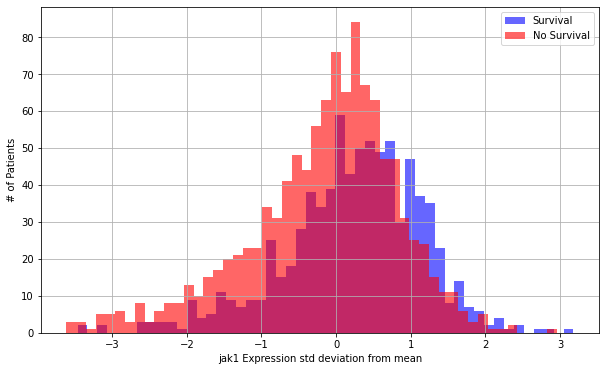

In [132]:
plt.figure(figsize=(10,6))
brca_expr[brca_expr['overall_survival'] == 1]['jak1'].hist(bins=50, color='blue', label='Survival', alpha=0.6)
brca_expr[brca_expr['overall_survival'] == 0]['jak1'].hist(bins=50, color='red', label='No Survival', alpha=0.6)
plt.xlabel('jak1 Expression std deviation from mean')
plt.ylabel('# of Patients')
plt.legend()
plt.show()

jak1 expression for survival (\~+0.5 std deviations) vs. non-survival patients (\~+0.2 standard deviations) are very close in value.

## Check for balanced data for Survival/No Survival Outcome

In [133]:
brca_expr.iloc[:, 24].value_counts(normalize = True)

0    0.579307
1    0.420693
Name: overall_survival, dtype: float64

The labeled data (y) is fairly balanced.

## ***Data preprocessing***

## Bin gene expression data using OneHotEncode

In [10]:
from sklearn.preprocessing import KBinsDiscretizer  
kbd = KBinsDiscretizer(n_bins=40, encode='onehot', strategy='quantile')
X_expr_kbd = kbd.fit_transform(X_gene_expr)

X_expr_kbd = X_expr_kbd.toarray()

## Encode categorical data for X_gene_mut
* Each column represents one gene whose mutation is associated with breast cancer
* Each gene can have various mutation sites on it, depending on the patient
* *Example:* H178P is a mutation on gene tp53 from patient_id 2; proline is present where a histidine should be at amino acid position #178
* Each mutation has a known association with breast cancer, and two or more mutations on the same gene or across genes in the same patient can lead to interactive, multiplicative effects on cancer severity
* Two ways to encode this: (1) OneHotEncode the various mutation sites for each gene or (2) Custom-binary-encode the mutation sites, where '1' means there is a mutation (does not distinguish the different mutation types or locations on the gene across patients) and '0' means there is no mutation on the gene for that patient
* OrdinalEncode followed by OneHotEncode to bin the various mutations (i.e. single, double, frameshift, insertion, deletion mutations etc) (not shown) has no additional advantage vs. custom-binary-encode and can even *decrease* accuracy in non-tree models

In [11]:
# OneHotEncode gene mutation columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
X_mut_ohe = np.array(ohe.fit_transform(X_gene_mut))
# Bring together gene expression and OneHotEncoded mutation data
X_gene_ohe = np.append(X_expr_kbd, X_mut_ohe, axis=1)

# Custom Binary Encode gene mutation columns
X_gene_mut = np.where(X_gene_mut == '0', 0, 1)

# Bring together gene expression and binary encoded mutation data
X_gene_bin = np.append(X_expr_kbd, X_gene_mut, axis=1)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Feature scale gene expression data for Logistic, SVM, kernel SVM
X_gene_nt = sc.fit_transform(X_gene_ohe)

# Feature scale binned gene expression data for kNN
X_gene_ntb = sc.fit_transform(X_gene_bin)

## Split the dataset into the Training and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train_nt, X_test_nt, y_train, y_test = train_test_split(X_gene_nt, y, test_size = 0.25, random_state = 42)
X_train_ntb, X_test_ntb, y_train, y_test = train_test_split(X_gene_ntb, y, test_size = 0.25, random_state = 42)

## ***Non-Tree-Based Algorithms***

## *Logistic Regression*

## Train the Logistic Regression Model on the Traning set

In [14]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression(random_state = 42)
log_class.fit(X_train_nt, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Logistic Regression k-Folds Validation

In [134]:
from sklearn.model_selection import cross_val_score
log_acc = cross_val_score(estimator = log_class, X = X_gene_nt, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', log_acc.mean(), '\nAccuracy SD:', log_acc.std())

cvacc = []
cvacc_std = []
cvacc.append(round(log_acc.mean(), 4))
cvacc_std.append(round(log_acc.std(), 4))

Accuracy Mean: 0.6008597409754752 
Accuracy SD: 0.06157225793839592


## Predict the Test set Results

In [16]:
y_pred_log = log_class.predict(X_test_nt)

## Make the Logistic Regression Confusion Matrix

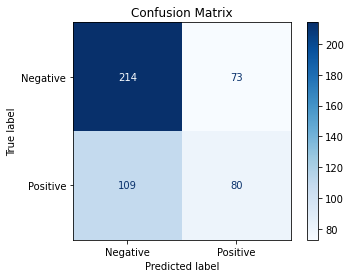

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(log_class, X_test_nt, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [135]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_log)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival = []
fpr_survival.append(round(FPR[0], 4))

In [136]:
test_acc = []
test_acc.append(round((accuracy_score(y_test, y_pred_log)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_log)*100),2)))

The accuracy score is 61.76%


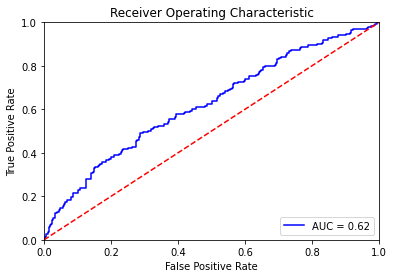

In [137]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = log_class.predict_proba(X_test_nt)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_log = metrics.auc(fpr, tpr)
roc_auc = []
roc_auc.append(round(roc_auc_log, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_log)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## *K-Nearest Neighbor*
- Based on Euclidean distance - similar data points are close to each other, close to the mode of a particular K label for classification
- Number of K labels chosen to reduce the number of errors while maintaining prediction accuracy

## Find optimal number of K neighbors using Elbow Method

Text(0, 0.5, 'Error Rate')

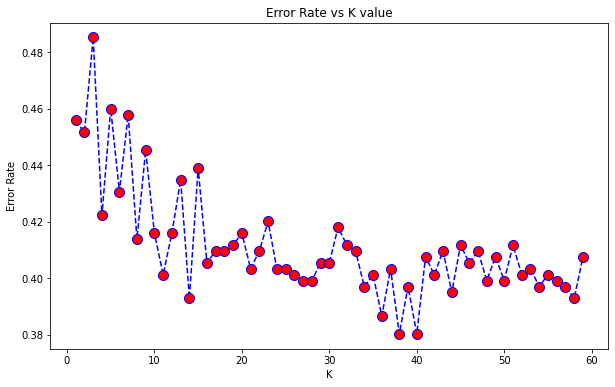

In [112]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_ntb, y_train)
  pred_i = knn.predict(X_test_ntb)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,60), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 38 gives the lowest Error Rate

In [25]:
knn_class = KNeighborsClassifier(n_neighbors = 38, metric = 'minkowski', p = 2)
knn_class.fit(X_train_ntb, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='uniform')

In [26]:
y_pred_knn = knn_class.predict(X_test_ntb)

In [138]:
from sklearn.model_selection import cross_val_score
knn_acc = cross_val_score(estimator = knn_class, X = X_gene_ntb, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', knn_acc.mean(), '\nAccuracy SD:', knn_acc.std())

cvacc.append(round(knn_acc.mean(), 4))
cvacc_std.append(round(knn_acc.std(), 4))

Accuracy Mean: 0.5787847891981261 
Accuracy SD: 0.04859032443194233


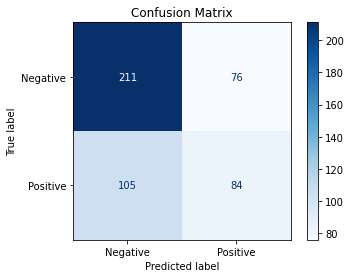

In [28]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(knn_class, X_test_ntb, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [139]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [140]:
# ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
roc_auc.append(round(roc_auc_knn, 2))
print('ROC-AUC: %.2f' % round(roc_auc_knn, 2))

ROC-AUC: 0.59


In [141]:
test_acc.append(round((accuracy_score(y_test, y_pred_knn)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

The accuracy score is 61.97%


## *Support Vector Machine*
- Finds a hyperplane in N-dimensional space (N = number of features) that classifies the data points
- Choose the hyperplane with maximum margin, i.e. maximum distance between data points of two classes
- Position and orientation of hyperplane are determined by support vectors, i.e. data points closest to the hyperplane

### Hypertuning parameters

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001],'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train_nt, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.608, total=  51.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.601, total=  47.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.678, total=  47.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.653, total=  47.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.618, total=  47.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.570, total=  48.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.570, total=  49.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.573, total=  48.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.572, total=  47.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.608, total=  48.5s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.601, total=  48.7s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.678, total=  49.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.653, total=  48.8s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.618, total=  49.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.570, total=  47.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.570, total=  47.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.572, total=  47.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.572, total=  49.1s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.608, total=  48.7s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.601, total=  48.9s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.678, total=  48.6s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.653, total=  48.9s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.618, total=  48.8s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 129.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

### These are the best parameters to use for SVM

In [34]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

### Instantiate SVM Model

In [35]:
svc_class = SVC(C=0.1, gamma=1, kernel = 'linear', random_state = 42)
svc_class.fit(X_train_nt, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred_svc = svc_class.predict(X_test_nt)

In [142]:
from sklearn.model_selection import cross_val_score
svc_acc = cross_val_score(estimator = svc_class, X = X_gene_nt, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', svc_acc.mean(), '\nAccuracy SD:', svc_acc.std())

cvacc.append(round(svc_acc.mean(), 4))
cvacc_std.append(round(svc_acc.std(), 4))

Accuracy Mean: 0.5982364287682558 
Accuracy SD: 0.06036135931934529


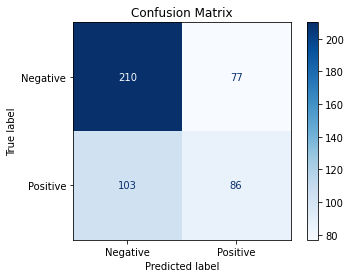

In [38]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(svc_class, X_test_nt, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [143]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [144]:
# ROC AUC
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
roc_auc.append(round(roc_auc_svc, 2))
print('ROC-AUC: %.2f' % round(roc_auc_svc, 2))

ROC-AUC: 0.59


In [145]:
test_acc.append(round((accuracy_score(y_test, y_pred_svc)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_svc)*100),2)))

The accuracy score is 62.18%


## ***Tree-Based Algorithms***

## Split the dataset into the Training and Test set

In [42]:
# Bring together gene expression and custom-binned mutation data
X_gene_tree = np.append(X_gene_expr, X_gene_mut, axis=1)

from sklearn.model_selection import train_test_split
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X_gene_tree, y, test_size = 0.25, random_state = 42)

## *Decision Tree Classification*
- Consists of root node (has children), internal node (has both parent and children), leaf node (has parent)
- Max_depth - *Number of levels:* the more levels, the more complex the model, which can result in overfitting the training data with high test error
- Information gain measures node purity, or how clever a node can split items

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_class.fit(X_train_tree, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [44]:
y_pred_dt = dt_class.predict(X_test_tree)

In [146]:
from sklearn.model_selection import cross_val_score
dt_acc = cross_val_score(estimator = dt_class, X = X_gene_tree, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', dt_acc.mean(), '\nAccuracy SD:', dt_acc.std())

cvacc.append(round(dt_acc.mean(), 4))
cvacc_std.append(round(dt_acc.std(), 4))

Accuracy Mean: 0.5236511435657206 
Accuracy SD: 0.046365400150149


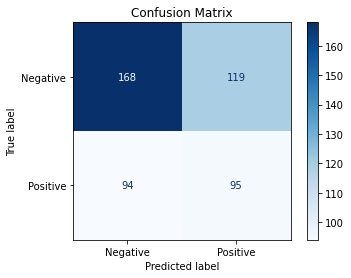

In [46]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(dt_class, X_test_tree, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [147]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_dt)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [148]:
test_acc.append(round((accuracy_score(y_test, y_pred_dt)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_dt)*100),2)))

The accuracy score is 55.25%


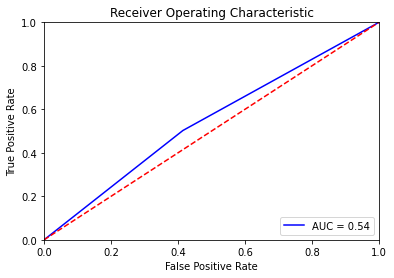

In [149]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dt_class.predict_proba(X_test_tree)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_dt = metrics.auc(fpr, tpr)
roc_auc.append(round(roc_auc_dt, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## *Random Forest Classification*
- Bagging/Bootstrapping technique - Random sampling of subset of data reduces bias and variance
- Ensemble method has multiple decision tree models run independently, then output is averaged/aggregated



In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators = 800, criterion = 'entropy', random_state = 42)
rf_class.fit(X_train_tree, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
y_pred_rf = rf_class.predict(X_test_tree)

In [150]:
from sklearn.model_selection import cross_val_score
rf_acc = cross_val_score(estimator = rf_class, X = X_gene_tree, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', rf_acc.mean(), '\nAccuracy SD:', rf_acc.std())

cvacc.append(round(rf_acc.mean(), 4))
cvacc_std.append(round(rf_acc.std(), 4))

Accuracy Mean: 0.5888040782584734 
Accuracy SD: 0.09077469429019053


**Random Forest gives the best cross-validation score**

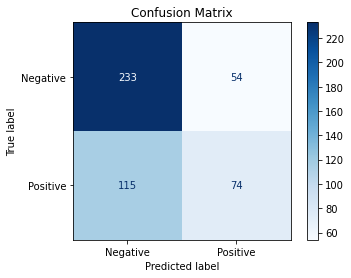

In [53]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(rf_class, X_test_tree, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [151]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_rf)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [152]:
test_acc.append(round((accuracy_score(y_test, y_pred_rf)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_rf)*100),2)))

The accuracy score is 64.5%


**Random Forest gives the best accuracy score**

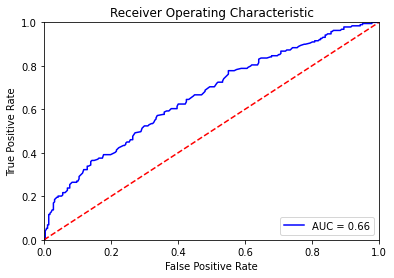

In [153]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_class.predict_proba(X_test_tree)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
roc_auc.append(round(roc_auc_rf, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Let's rank the features (gene expression and mutations) by importance

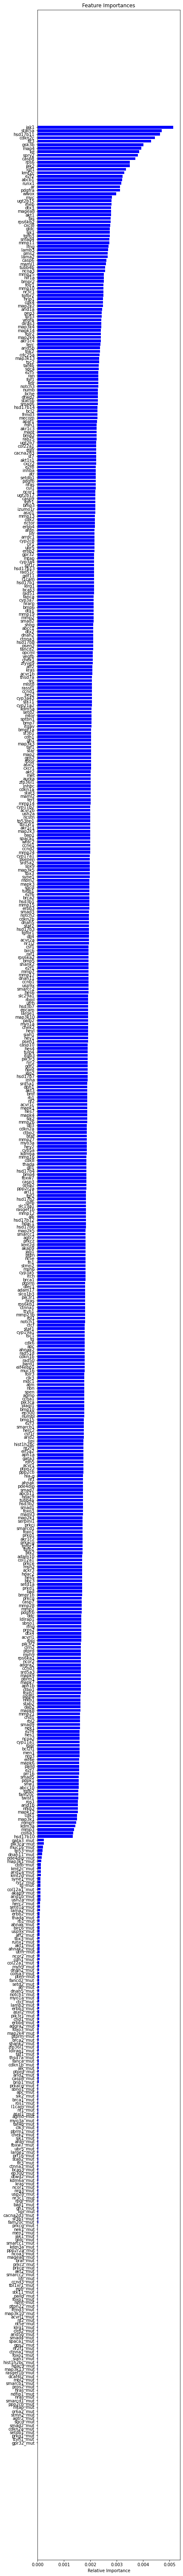

In [57]:
rf_importances = rf_class.feature_importances_
indices = np.argsort(rf_importances)

plt.figure(figsize=(6,110))
plt.title('Feature Importances')
plt.barh(range(len(indices)), rf_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), brca_gene.columns[indices])
plt.xlabel('Relative Importance')

plt.show()

**Gene expression levels of *jak1, stat5a, hsd17b11, cdkn2c, flt3, gsk3b, map4* among others are at the top of the list of Feature Importances when it comes to predicting overall breast cancer survival. The actual mutations themselves and the various types of mutations are not as important for predicting survival.**

## *XGBoost Classification*
- Builds sequential trees using parallel implementation by switching order of loops (1) to enumerate leaf nodes and (2) to calculate features
- Tree pruning - 'max-depth' parameter defined first then trees 'pruned' to improve computational performance
- Finds optimal split points in weighted datasets
- Built-in regularization via LASSO (L1) or Ridge (L2) to prevent overfitting
- Built-in cross validation

## Tune XGBClassifier n_estimators parameter

In [58]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model = XGBClassifier()
eval_set = [(X_test_tree, y_test)]
model.fit(X_train_tree, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test_tree)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.68926
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.67264
[2]	validation_0-logloss:0.67100
[3]	validation_0-logloss:0.66796
[4]	validation_0-logloss:0.67088
[5]	validation_0-logloss:0.67941
[6]	validation_0-logloss:0.67629
[7]	validation_0-logloss:0.68114
[8]	validation_0-logloss:0.68812
[9]	validation_0-logloss:0.69238
[10]	validation_0-logloss:0.69118
[11]	validation_0-logloss:0.70465
[12]	validation_0-logloss:0.71096
[13]	validation_0-logloss:0.71837
Stopping. Best iteration:
[3]	validation_0-logloss:0.66796

Accuracy: 58.82%


Best XGBoost n_estimator given X_test and y_test is 30.

In [70]:
from xgboost import XGBClassifier
xgb_class = XGBClassifier(n_estimators=3)
xgb_class.fit(X_train_tree, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
y_pred_xgb = xgb_class.predict(X_test_tree)

In [154]:
from sklearn.model_selection import cross_val_score
xgb_acc = cross_val_score(estimator = xgb_class, X = X_gene_tree, y = y, cv = 10, scoring = 'accuracy')
print('Accuracy Mean:', xgb_acc.mean(), '\nAccuracy SD:', xgb_acc.std())

cvacc.append(round(xgb_acc.mean(), 4))
cvacc_std.append(round(xgb_acc.std(), 4))

Accuracy Mean: 0.5751667125930007 
Accuracy SD: 0.06780636830010178


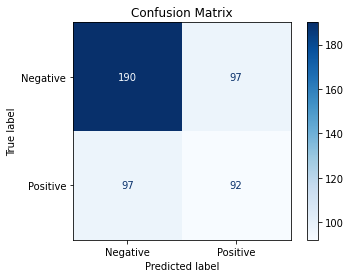

In [73]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
class_names = np.array(['Negative', 'Positive'])
title = 'Confusion Matrix'
disp = plot_confusion_matrix(xgb_class, X_test_tree, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             values_format='d')
disp.ax_.set_title(title)
plt.show()

In [155]:
# Determine False Positive Rate for the patients who are predicted to survive but end up dying
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_xgb)

FP = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TN = np.diag(cnf_matrix)
FP = FP.astype(float)
TN = TN.astype(float)

# False positive rate
FPR = FP/(TN+FP)

fpr_survival.append(round(FPR[0], 4))

In [156]:
test_acc.append(round((accuracy_score(y_test, y_pred_xgb)*100),2))
print('The accuracy score is {}%'.format(round((accuracy_score(y_test, y_pred_xgb)*100),2)))

The accuracy score is 59.24%


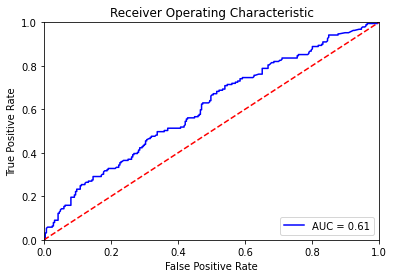

In [157]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_class.predict_proba(X_test_tree)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_xgb = metrics.auc(fpr, tpr)
roc_auc.append(round(roc_auc_xgb, 2))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model Summary

In [159]:
model = ['Logistic Regression', 'K-Nearest Neighbor', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
sum_stats = pd.DataFrame(zip(model, cvacc, cvacc_std, test_acc, fpr_survival, roc_auc))
sum_stats.columns = ['Model', 'Cross Validation Score', 'CV std dev', 'CM Test Accuracy (%)', 'False Positive Rate', 'ROC-AUC']
sum_stats = sum_stats.sort_values('CM Test Accuracy (%)', ascending=False)
sum_stats = sum_stats.reset_index(drop=True)
sum_stats.index += 1 
sum_stats

,Model,Cross Validation Score,CV std dev,CM Test Accuracy (%),False Positive Rate,ROC-AUC
1,Random Forest,0.5888,0.0908,64.50,0.1882,0.66
2,SVM,0.5982,0.0604,62.18,0.2683,0.59
3,K-Nearest Neighbor,0.5788,0.0486,61.97,0.2648,0.59
4,Logistic Regression,0.6009,0.0616,61.76,0.2544,0.62
5,XGBoost,0.5752,0.0678,59.24,0.3380,0.61
6,Decision Tree,0.5237,0.0464,55.25,0.4146,0.54


### Evaluate Classification Reports for Top 4
- 0 = No Survival
- 1 = Survival

#### Random Forest

In [164]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73       287
           1       0.58      0.39      0.47       189

    accuracy                           0.64       476
   macro avg       0.62      0.60      0.60       476
weighted avg       0.63      0.64      0.63       476



#### SVM

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       287
           1       0.53      0.46      0.49       189

    accuracy                           0.62       476
   macro avg       0.60      0.59      0.59       476
weighted avg       0.61      0.62      0.62       476



#### K-Nearest Neighbor

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       287
           1       0.53      0.44      0.48       189

    accuracy                           0.62       476
   macro avg       0.60      0.59      0.59       476
weighted avg       0.61      0.62      0.61       476



#### Logistic Regression

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       287
           1       0.52      0.42      0.47       189

    accuracy                           0.62       476
   macro avg       0.59      0.58      0.58       476
weighted avg       0.61      0.62      0.61       476



Based on the cross validation score on the Training set with a split of 25% Test and 75% Training sizes, Random Forest, SVM, K-Nearest Neighbor, and Logistic Regression are the top models followed closely by XGBoost and Decision Tree. We must pay special attention to the False Positive Rate, which is the rate at which patients are predicted to survive breast cancer but, in reality, don't. With this in mind, Random Forest has the best accuracy and the lowest FPR. Furthermore, the RF precision value increases vs. the other Top 4 models, and the RF f1-score is comparable to that for the other models. The RF recall value is lower for the '1' (Survival) classification. Taken together, Random Forest is the best overall model given the genetics dataset.

## Discussion

**More Features Needed To Improve Survival-No Survival Prediction Accuracy**  
According to the ranking of the Feature Importances of the top model - Random Forest, jak1 and stat5a gene expressions are the top two features. This makes sense since activation of the JAK/STAT pathway is critical to breast cancer progression. Janus tyrosine kinases (JAKs) are tyrosine kinases that activate STATs via STATs tyrosine phosphorylation, resulting in malignant tumor progression. In the Exploratory Data Analysis at top, we show that stat5a gene expression is lower in non-survival patients vs. survival patients. It has been shown that [low expression of STAT5a protein is associated with breast cancer progression and unfavorable clinical outcomes](https://breast-cancer-research.biomedcentral.com/articles/10.1186/bcr3328). Jak1 expression, however, seems to be the same in both survival and non-survival patients.

The best prediction accuracy (~65% - Random Forest) using gene expression and mutations as features, in general, is not very good and certainly not as good as predictions using clinical data as features. Gene expression levels, such as stat5a, are known to directly associate with breast cancer progression. However, cancer biology and patient outcomes are more than just relying on gene expression and mutation information. To improve prediction accuracy, other types of features need to be included, such as post-translational protein modifications leading to changes in protein activity levels (i.e. phosphorylation and glycosylation). Phosphorylation levels of proteins associated with pathways leading to breast cancer are important to know since they put these proteins in their "active form" and, thus, activate the JAK/STAT pathway. Higher JAK activity levels due to phosphorylation result in progression of the JAK/STAT pathway and tumor formation. Finally, glycosylation of proteins involved in breast cancer are implicated in tumor formation and metastasis. Glycosylation is the attachment of a carbohydrate to a protein that determines protein structure, function, and stability.

Mutations as features in the breast cancer genetic data were at the bottom of the ranking for Feature Importances in the Random Forest model. Without any additional information provided, these mutations were subsequently treated equally as categorical data. However, certain mutations can drive the breast cancer progression more severely, and an ordinal rank order of these mutations based on cancer severity would be ideal for mutations to significantly factor into predicting if a patient survives or not. If this ranking is not known, one can conceivably model the predicted secondary and tertiary protein structure of the gene mutants using [RaptorX](http://raptorx.uchicago.edu/StructurePrediction/) and do convolutional neural network to bin and categorize mutations that are similar in structure, for example. This type of structure modeling can act as a surrogate for cancer severity since it is anticipated that certain protein structure alterations resulting from gene mutations can be a key feature in predicting survival/no survival.

**Data Preprocessing**  
To optimize each of the models, the data were preprocessed in different ways before feeding them into the models. For logistic regression, SVM, and kernel SVM, the gene expression data were binned, and the gene mutation data were OneHotEncoded. For K-Nearest Neighbor, the gene expression data were binned, and the gene mutation data were custom binary encoded. For decision tree, random forest and XGBoost, the gene expression data were given as-is (not binned), and the gene mutation data were custom binary encoded.

The SVM model parameters (C, gamma, kernel) were tuned to improve the cross validation score and Confusion Matrix test accuracy, while the random forest and XGBoost model parameters (n_estimators, gamma) were tuned for the same reasons.

## Conclusion

#### **Overall, the prediction accuracy based on genetic data (65% - Random Forest) on whether a patient will survive breast cancer or not is lower than the accuracy predicted from clinical data (90% K-Nearest Neighbor). Cross validation scores for breast cancer survival using genetic data top out at ~59%, while CV scores using clinical data top out at 88%. Nevertheless, taken together, applying Machine Learning models on clinical and genetic datasets is a powerful tool which can collectively help doctors and medical staff assess a patient's overall survival based on her clinical and genetic profiles. Doctors and patients can then take the best course of action in the fight against breast cancer.**